In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784',version=1)

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [10]:
X,y = mnist['data'],mnist['target']

In [12]:
import matplotlib.pyplot as plt

In [13]:
some_digit = X[0]

In [15]:
some_digit.shape

(784,)

In [16]:
some_digit_image = some_digit.reshape(28,28)

In [17]:
some_digit_image.shape

(28, 28)

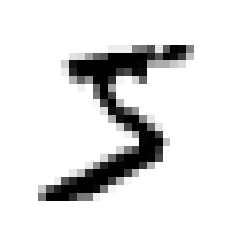

In [18]:
plt.imshow(some_digit_image,cmap='binary')
plt.axis('off')
plt.show()

In [19]:
y[0]

'5'

In [22]:
type(y[0])

str

In [24]:
import numpy as np
y = y.astype(np.uint8)

In [27]:
type(y[0])

numpy.uint8

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [30]:
X_train.shape

(49000, 784)

In [31]:
y_train.shape

(49000,)

In [32]:
X_test.shape

(21000, 784)

In [34]:
y_test.shape

(21000,)

In [35]:
#Let us first try to train a binary classifier by taking only those records that are 5.

In [36]:
y_train_5 = (y_train==5)

In [37]:
y_test_5 = (y_test==5)

In [38]:
y_train_5[0:3]

array([False, False, False])

In [39]:
y_test_5[0:3]

array([False, False, False])

In [40]:
from sklearn.linear_model import SGDClassifier

In [41]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [43]:
sgd_clf.predict([some_digit])

array([ True])

In [44]:
from sklearn.model_selection import cross_val_score

In [46]:
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([0.96761357, 0.9631421 , 0.96106043])

In [47]:
#Looks Good but lets us create a BaseEstimator and check its accuracy

In [48]:
from sklearn.base import BaseEstimator

In [49]:
class Never5Classifier(BaseEstimator):
    def fit (self,X,y=None):
        return self
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)

In [50]:
never_5_clf = Never5Classifier()

In [51]:
cross_val_score(never_5_clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([0.91122811, 0.91024307, 0.90926345])

In [52]:
#thus the base Classifier which predicts 0 for any input has an accuracy of 91%
sum(y_train_5)/len(y_train_5)

0.08975510204081633

In [53]:
#the number of 5 in the train dataset is 8.9%

In [57]:
from sklearn.model_selection import cross_val_predict

In [58]:
y_train_5_predict = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [59]:
from sklearn.metrics import confusion_matrix

In [60]:
confusion_matrix(y_train_5,y_train_5_predict)

array([[43846,   756],
       [ 1011,  3387]], dtype=int64)

In [61]:
#thus 3387 records have been correctly classified as 5's where as 43846 records have been correctly classified as not 5's
#However 1011 records that are 5 have been incorrectly classified as non5's (False Negatives) and 756 records that are 
#not5's have been classified as 5's (False Positives)

In [62]:
from sklearn.metrics import precision_score, recall_score

In [63]:
precision_score(y_train_5,y_train_5_predict) # 3387/(3387+756)

0.8175235336712527

In [64]:
recall_score(y_train_5,y_train_5_predict) #3387/(3387+1011)

0.7701227830832197

In [65]:
#an ideal scenario will be one with a high Precision and high recall

In [66]:
from sklearn.metrics import f1_score

In [67]:
f1_score(y_train_5,y_train_5_predict) #f1_score = 2 (precision*recall)/(precision+recall)

0.793115560238848

In [68]:
from sklearn.metrics import roc_auc_score, roc_curve

In [69]:
roc_auc_score(y_train_5,y_train_5_predict)

0.8765864352616225

### Random Forest Classifier

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
forest_clf = RandomForestClassifier(random_state=42,n_estimators=50)

In [74]:
y_probas_forest = cross_val_predict(forest_clf,X_train,y_train_5,method='predict_proba')

In [75]:
y_probas_forest[0]

array([1., 0.])

In [76]:
y_scores_forest = y_probas_forest[:,1]

In [81]:
print(y_probas_forest[:,1])

[0.   0.   0.   ... 0.   0.   0.06]


In [78]:
fpr , tpr, thresholds = roc_curve(y_train_5,y_scores_forest)

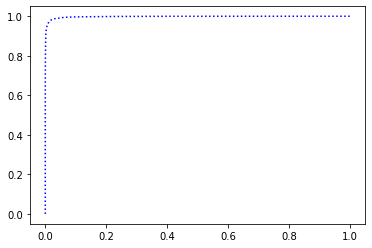

In [80]:
plt.plot(fpr,tpr,"b:",label='SGD')

### MultiClass Classification 

In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
scaler = StandardScaler()

In [85]:
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [87]:
##cross_val_score(sgd_clf,X_train_scaled,y_train,cv=3,scoring='accuracy')

In [92]:
sgd_clf.fit(X_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [93]:
y_train_predict = sgd_clf.predict(X_train)

In [94]:
conf_mx = confusion_matrix(y_train,y_train_predict)

In [95]:
conf_mx

array([[4808,    0,    1,    7,    4,    4,    5,    1,   15,    0],
       [   2, 5255,   41,   36,    5,   20,   22,   19,  105,    8],
       [ 158,   14, 4062,  128,   69,   17,  129,  100,  176,    4],
       [  60,    4,   99, 4430,   18,  117,   23,   84,  118,   12],
       [  41,   10,    8,    5, 4557,    3,   70,   53,   78,   63],
       [ 112,   11,   12,  192,   97, 3647,  140,   28,  136,   23],
       [  86,    6,   10,    8,   18,   17, 4614,    6,   23,    0],
       [  22,    6,   48,    9,   33,    5,    6, 4872,   25,   19],
       [  72,   50,   67,  184,   36,  178,   59,   47, 4137,    3],
       [  69,    9,   14,  152,  336,  108,    4,  868,  422, 2886]],
      dtype=int64)

In [98]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      4845
           1       0.98      0.95      0.97      5513
           2       0.93      0.84      0.88      4857
           3       0.86      0.89      0.88      4965
           4       0.88      0.93      0.91      4888
           5       0.89      0.83      0.86      4398
           6       0.91      0.96      0.94      4788
           7       0.80      0.97      0.88      5045
           8       0.79      0.86      0.82      4833
           9       0.96      0.59      0.73      4868

    accuracy                           0.88     49000
   macro avg       0.89      0.88      0.88     49000
weighted avg       0.89      0.88      0.88     49000



### Classifying Multiple Labels (MultiLabel Classifier)

In [96]:
from sklearn.neighbors import KNeighborsClassifier

In [97]:
y_train_large = (y_train>=7)
y_train_odd = (y_train % 2 ==1)
y_multilabel = np.c_[y_train_large,y_train_odd]

In [99]:
knn_clf = KNeighborsClassifier(n_neighbors=5)

In [100]:
knn_clf.fit(X_train,y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [101]:
knn_clf.predict([some_digit])

array([[False,  True]])